In [1]:
import sys
from os.path import join
sys.path.insert(0, 'utils')

import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import sbm

## Load data and visualize adjacency matrix

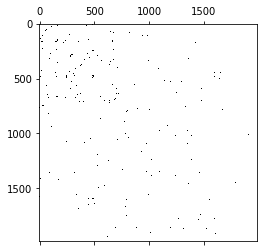

In [2]:
dataFileName = join('data', 'facebook-wall-filtered.txt')
net = nx.read_edgelist(dataFileName,create_using=nx.DiGraph(),data=(('Timestamp',int),))
adj = nx.to_numpy_array(net)
plt.figure()
plt.spy(adj)
plt.show()

## Estimate cluster memberships using spectral clustering

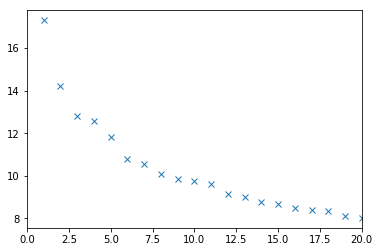

Enter the number of clusters: 2
[1812  173]


In [3]:
clusterId = sbm.spectralCluster(adj,directed=True)
nClusters = np.max(clusterId)+1
clusterSizes = np.histogram(clusterId, bins=nClusters)[0]
print(clusterSizes)

### Re-order nodes by class memberships and re-examine adjacency matrix

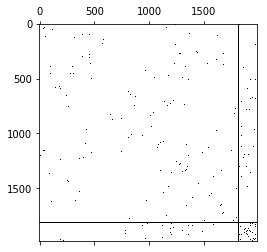

In [6]:
sbm.spyClusters(adj,clusterId)

## Estimate edge probabilities at the block level

In [7]:
blockProb,logLik = sbm.estimateBlockProb(adj,clusterId,directed=True)
print(blockProb)
print(logLik)

[[0.00347185 0.00344205]
 [0.00272748 0.0675158 ]]
-96346.13030670563


### View estimated edge probabilities as a heat map

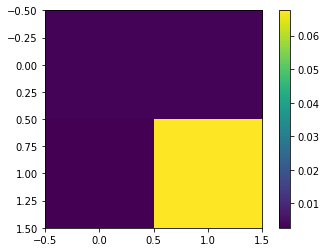

In [8]:
plt.figure()
plt.imshow(blockProb)
plt.colorbar()
plt.show()

## Compute reciprocity and transitivity of actual network using NetworkX

In [9]:
recip = nx.overall_reciprocity(net)
print(recip)
trans = nx.transitivity(net)
print(trans)

0.6964006259780907
0.14944682874905163


## Simulate new networks from SBM fit to check model goodness of fit

In [10]:
nRuns = 10
blockProbSim = np.zeros((nClusters,nClusters,nRuns))
recipSim = np.zeros(nRuns)
transSim = np.zeros(nRuns)
for run in range(nRuns):
    # Simulate new adjacency matrix and create NetworkX object for it
    adjSim = sbm.generateAdj(clusterId,blockProb,directed=True)
    netSim = nx.DiGraph(adjSim)
    blockProbSim[:,:,run] = sbm.estimateBlockProb(adjSim,clusterId,
                                                  directed=True)[0]
    recipSim[run] = nx.overall_reciprocity(netSim)
    transSim[run] = nx.transitivity(netSim)
meanBlockProbSim = np.mean(blockProbSim,axis=2)
stdBlockProbSim = np.std(blockProbSim,axis=2)

In [11]:
print('Actual block densities:')
print(blockProb)
print('Mean simulated block densities:')
print(meanBlockProbSim)
print('95% confidence interval lower bound:')
print(meanBlockProbSim-2*stdBlockProbSim)
print('95% confidence interval upper bound:')
print(meanBlockProbSim+2*stdBlockProbSim)

Actual block densities:
[[0.00347185 0.00344205]
 [0.00272748 0.0675158 ]]
Mean simulated block densities:
[[0.00346823 0.00341302]
 [0.00268091 0.06810727]]
95% confidence interval lower bound:
[[0.00340805 0.00317351]
 [0.00259295 0.06591789]]
95% confidence interval upper bound:
[[0.0035284  0.00365253]
 [0.00276886 0.07029665]]


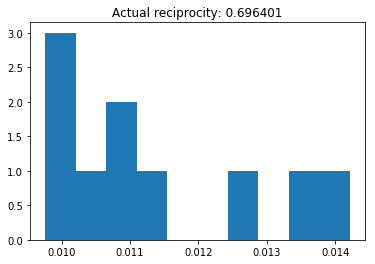

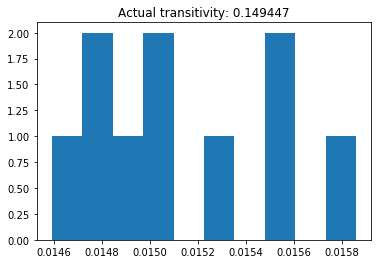

In [12]:
plt.figure()
plt.hist(recipSim)
plt.title('Actual reciprocity: %f' % recip)
plt.show()
plt.figure()
plt.hist(transSim)
plt.title('Actual transitivity: %f' % trans)
plt.show()